**Python version:**  3.x

In [1]:
# set the path of the directories where your modules and files are
modules_path = 'C:\\Users\loren\Documents\Progetti\__repo__\_myModules'
files_path = 'C:\\Users\loren\Documents\Progetti\Scuola\AdvDataMining\_files'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modules_path) and modules_path not in sys.path:
    sys.path.append(modules_path)

modulesList = os.listdir(modules_path)
print('Available Modules for the project:', modulesList,sep='\n', end='\n\n')

filesList = os.listdir(files_path)
print('Available Files for the project:', filesList,sep='\n')

%matplotlib inline

import df_handle
import data_understanding
import data_preparation
import modeling
import model_evaluation

Available Modules for the project:
['data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']

Available Files for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'test1.csv', 'test2.csv', 'training.csv']


In [3]:
df, ts = df_handle.import_df(file_name='training.csv', search_in_folder=files_path,
                             date_col_name='date', ts_name='Temperature', time_freq='min')
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,hour,minute,second
date,,,,,,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,2015,2,4,17,51,0
2015-02-04 17:52:00,23.15,27.2675,429.5,714.000000,0.004783,1,2015,2,4,17,52,0
2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,2015,2,4,17,53,0
2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,2015,2,4,17,54,0
2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,2015,2,4,17,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,2015,2,10,9,29,0
2015-02-10 09:30:00,21.05,35.9950,433.0,789.500000,0.005563,1,2015,2,10,9,30,0
2015-02-10 09:31:00,21.10,36.0950,433.0,798.500000,0.005596,1,2015,2,10,9,31,0


In [4]:
ts

2015-02-04 17:51:00    23.18
2015-02-04 17:52:00    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:30:00    21.05
2015-02-10 09:31:00    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Freq: T, Name: Temperature, Length: 8143, dtype: float64

In [5]:
import matplotlib.pyplot as plt

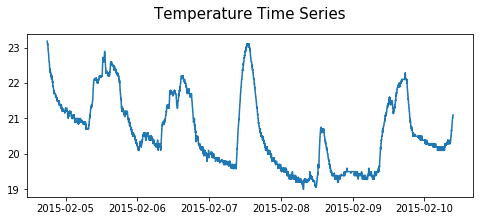

In [6]:
plt.figure(figsize=(8,3))
plt.plot(ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [7]:
modeling.stationarity_test(ts=ts)

Results of Dickey-Fuller Test:
Test Statistic                   -2.694434
p-value                           0.075006
#Lags Used                       21.000000
Number of Observations Used    8121.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64


In [8]:
stationary_ts=data_preparation.stationarize_ts(ts, mov_avg_periods=300)
stationary_ts

2015-02-04 22:50:00   -0.027645
2015-02-04 22:51:00   -0.027362
2015-02-04 22:52:00   -0.031305
2015-02-04 22:53:00   -0.026789
2015-02-04 22:54:00   -0.026510
                         ...   
2015-02-10 09:29:00    0.036972
2015-02-10 09:30:00    0.036835
2015-02-10 09:31:00    0.039062
2015-02-10 09:32:00    0.038900
2015-02-10 09:33:00    0.038747
Freq: T, Name: Temperature, Length: 7844, dtype: float64

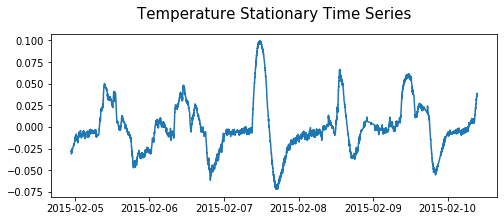

In [9]:
plt.figure(figsize=(8,3))
plt.plot(stationary_ts)
plt.title('Temperature Stationary Time Series', pad=15, size=15)
plt.show()

In [10]:
modeling.stationarity_test(ts=stationary_ts)

Results of Dickey-Fuller Test:
Test Statistic                   -3.877138
p-value                           0.002210
#Lags Used                       25.000000
Number of Observations Used    7818.000000
Critical Value (1%)              -3.431187
Critical Value (5%)              -2.861910
Critical Value (10%)             -2.566967
dtype: float64


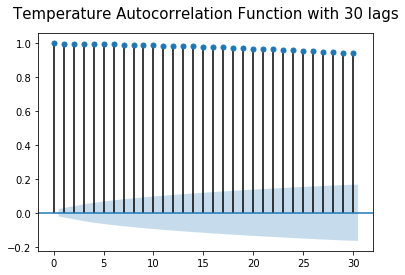

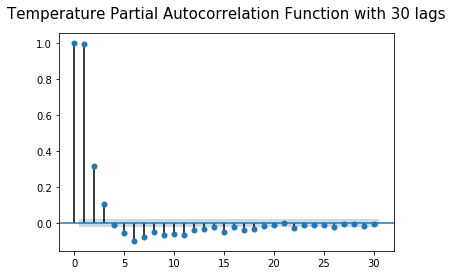

In [11]:
modeling.autocorr_func(stationary_ts)

# Forecast

In [12]:
from pandas.tseries.offsets import DateOffset

In [13]:
df.index[0] + DateOffset(minutes=6129)

Timestamp('2015-02-09 00:00:00')

## Analysis on not Stationary Series

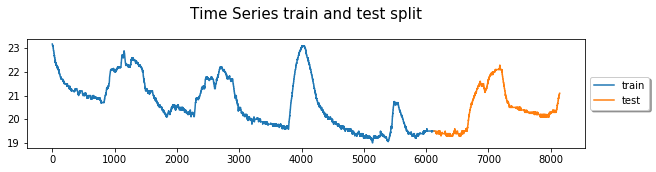

In [53]:
selected_ts = ts

ts_train, ts_test = df_handle.forecast_setup(ts = selected_ts, split_idx = 6129)

## \Holt\

In [33]:
smoothing_level=0.01
smoothing_slope=0.1
forecaster = modeling.Holt(ts_train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


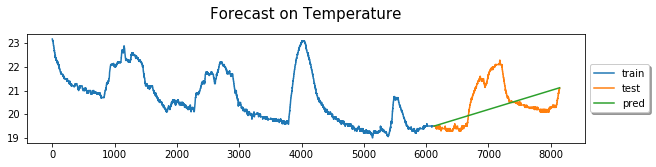

R2: 0.054011082183513026

Mean Absolute Percentage Error: 0.032482985198986465
MAX Absolute Percentage Error: 0.09551799881659478
Total Absolute Percentage Error: 65.42073219075876

Root Mean Squared Error: 0.8387205683541117

Mean Absolute Error: 0.6606396500016756
Median Absolute Error: 0.484905938180912


In [34]:
model_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \ARIMA\

In [54]:
forecaster = modeling.ARIMA(ts_train, order=(4, 0, 1)).fit()

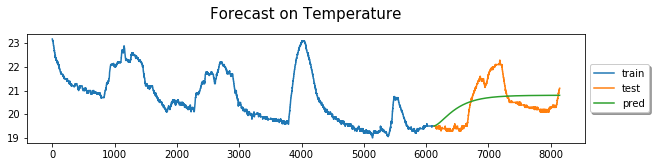

R2: 0.34786990792875727

Mean Absolute Percentage Error: 0.029532698573391775
MAX Absolute Percentage Error: 0.07441034073282767
Total Absolute Percentage Error: 59.47885492681101

Root Mean Squared Error: 0.6963721429239723

Mean Absolute Error: 0.6077822130539575
Median Absolute Error: 0.5479622877886872


In [55]:
model_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## Analysis on Stationary Series

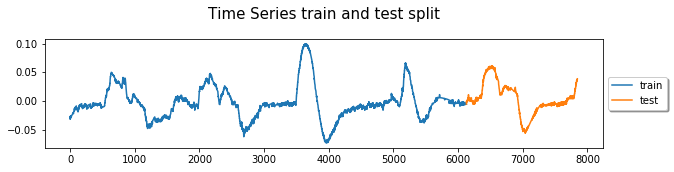

In [50]:
selected_ts = stationary_ts

ts_train, ts_test = df_handle.forecast_setup(ts = selected_ts, split_idx = 6129)

## \Simple Exponential Smoothing\

In [48]:
smooth_level = 0

forecaster = modeling.SimpleExpSmoothing(ts_train).fit(smoothing_level=smooth_level, optimized=True)

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


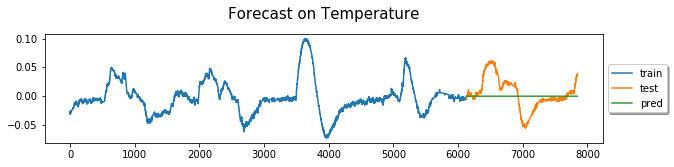

R2: 0.015083966298006568

Mean Absolute Percentage Error: inf
MAX Absolute Percentage Error: inf
Total Absolute Percentage Error: inf

Root Mean Squared Error: 0.027032092425402388

Mean Absolute Error: 0.020004817226852975
Median Absolute Error: 0.01301279762686125


In [49]:
model_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \Exponential Smoothing\

In [22]:
seasonal_periods=1440

forecaster = modeling.ExponentialSmoothing(ts_train, seasonal_periods=seasonal_periods, trend=None, seasonal='add').fit()

C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\loren\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


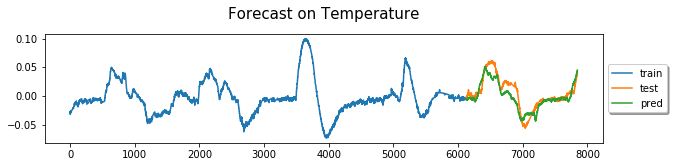

R2: 0.7697840986355227

Mean Absolute Percentage Error: 1.2421663645053875
MAX Absolute Percentage Error: 62.82216657533407
Total Absolute Percentage Error: 2130.3153151267384

Root Mean Squared Error: 0.013069161321079962

Mean Absolute Error: 0.010117552713512577
Median Absolute Error: 0.007840668822408199


In [23]:
model_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)

## \Seasonal ARIMA\

In [24]:
#forecaster = modeling.SARIMAX(endog=ts_train, seasonal_order=(4, 0, 1, 1440),
#                              enforce_stationarity=False).fit(disp=False)

#, order=(1,0,0), seasonal_order=(12, 1, 0, 1)

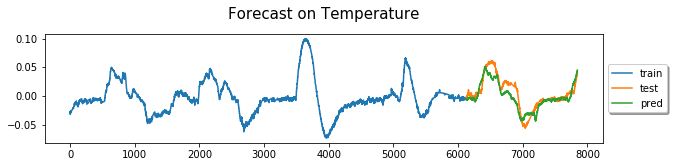

R2: 0.7697840986355227

Mean Absolute Percentage Error: 1.2421663645053875
MAX Absolute Percentage Error: 62.82216657533407
Total Absolute Percentage Error: 2130.3153151267384

Root Mean Squared Error: 0.013069161321079962

Mean Absolute Error: 0.010117552713512577
Median Absolute Error: 0.007840668822408199


In [25]:
model_evaluation.test_forecast(forecaster=forecaster, ts_test=ts_test, ts_train=ts_train, ts=selected_ts)